# Installing and Using R in Jupyter

While Jupyter is most commonly associated with Python, it is truly a general purpose data analysis framework which can be used with a variety of other languages. iPython kernels exist for almost every language, including R, Julia, MATLAB, ROOT, and even compiled languages such as C/C++. The complete list of kernels can be found <a href="https://github.com/jupyter/jupyter/wiki/Jupyter-kernels">here</a>.

In this notebook, we demonstrate how to install R in Jupyter, and provide some sample statistical analyses.

## Installation

### Install with Anaconda (recommended)

In order to install the R-Essentials package for Jupyter, you must have a distribution of R already installed locally. You can download R from <a href="https://www.r-project.org/">the R project website.</a>

In Bash, we can easily install the R kernel into the current environment with a single command:

        [username@host directory]$ conda install -c r r-essentials

Alternatively, you can create a new environment just for R:

        [username@host directory]$ conda create -n my-r-env -c r r-essentials

Both of these commands will also work on MS-DOS if "conda" is a path variable.

### Install from R 

To install from the R interpreter, run the following commands:

        install.packages('devtools')
        devtools::install_github('IRkernel/IRkernel') #or devtools::install_local('IRkernel-master.tar.gz')
        IRkernel::installspec()  # to register the kernel in the current R installation


## Sample R Code

In the following cells, I demonstrate a few basic statistical analyses using R inside Jupyter, including descriptive statistics, linear regression analysis, and distribution comparison. 

### Descriptive Statistics

[1] 47.75

[1] 29.16505

[1] 7.291262

[1] 16

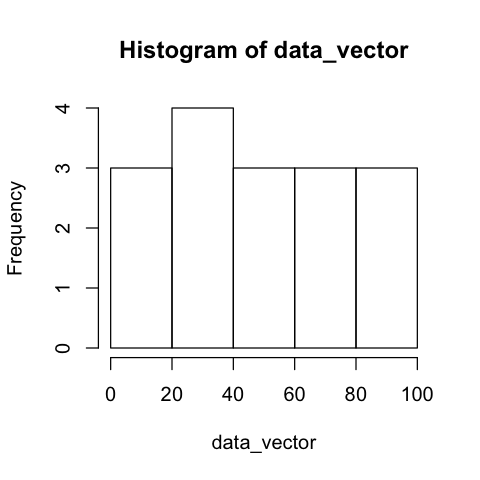

In [19]:
# Clear the environment
rm(list=ls()) 

# Let's make some data.

data_vector <- c(15,23,37,82,51,75,28,96,11,3,76,61,53,21,49,83)

# Define a function for SEM.

std_err_mean <- function(dataset){
    stdev <- sd(dataset)
    n <- NROW(dataset)
    stderr <- stdev/sqrt(n)
    return(stderr)
}

# Some basic stats.

mean(data_vector)
sd(data_vector)
std_err_mean(data_vector)
NROW(data_vector)

# Create a histogram
options(repr.plot.width=4, repr.plot.height=4) # resize the figure.
hist(data_vector)

The data vector we created contains 16 points, as returned from NROW(), and has a mean of $47.75 \pm 29.17$. The histogram of the data is shown above.

### Linear Regression Analysis

To do some linear regression, we will use the "cars" example data set that is native to R, which includes the speed and distance traveled of a car. This means that are two columns, each having 50 measurements. First, let's confirm this:

In [29]:
rm(list=ls()) 
nrow(cars)
ncol(cars)

[1] 50

[1] 2

Now let's plot the cars data set.

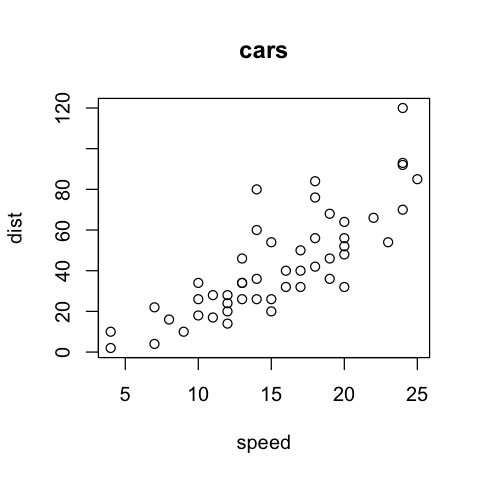

In [31]:
plot(cars, main="cars")

Now let's try fitting a line to this data set. We'll break the data frame into two, independent vectors, and then we'll use those vectors as a parameter into a linear regression tool.

In [81]:
distance <- cars$dist
speed <- cars$speed

fit <- lm(distance ~ speed)
summary(fit)


Call:
lm(formula = distance ~ speed)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


The summary of the fit computed above provides a wealth of information about the regression analysis, including the best-fit parameters, residual distribution, and statistical significance. We can now visualize the fit against our model:

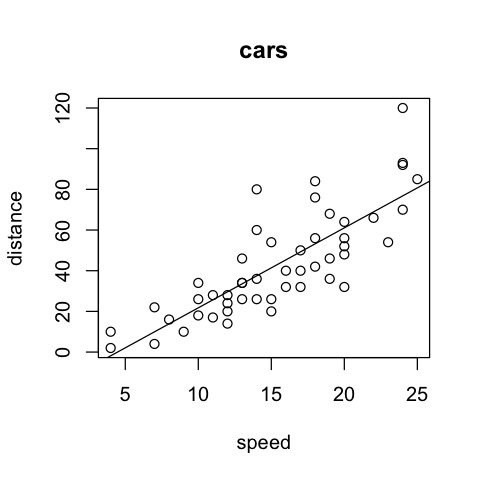

In [82]:
plot(speed, distance, main="cars")
abline(fit)

### Comparing Distributions

In the few cells below, we generate two random distributions of data. We plot their histograms, and use paired, two-sided t-test to determine if the means are significantly different. 

[1] -0.096547

[1] -0.05424759

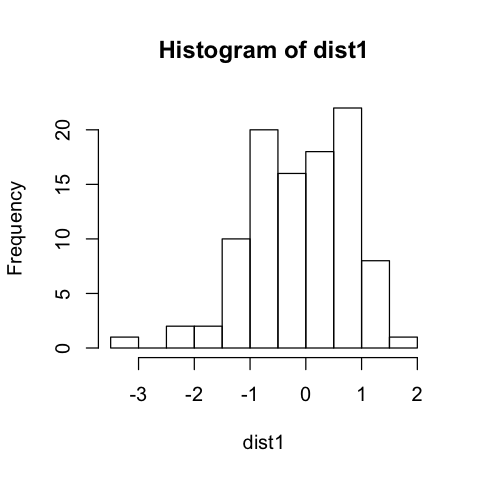

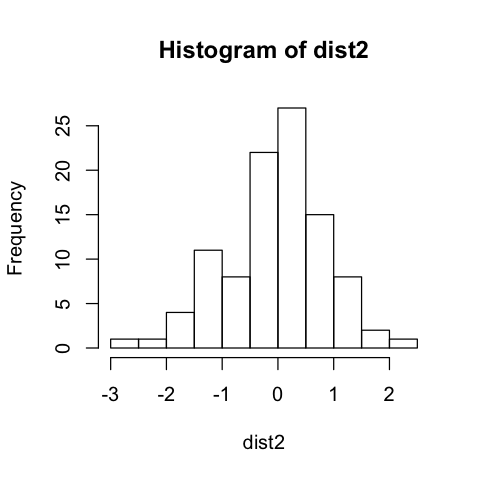

In [77]:
set.seed(121)

dist1 <- rnorm(100)

set.seed(391)
dist2 <- rnorm(100)

mean(dist1)
mean(dist2)

hist(dist1)
hist(dist2)

In [74]:
# Now let's do a t-test to compare the difference in their means

t.test(dist1, dist2, alternative="two.sided", var.equal=F, paired=T)


	Paired t-test

data:  dist1 and dist2
t = -0.4923, df = 99, p-value = 0.6236
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3416082  0.2057942
sample estimates:
mean of the differences 
            -0.06790704 


According to the results of the t-test above, the difference of the means of our two distributions is not statistically significant ($t=-0.4924$, $df=99$, $p > .05$).